In [1]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<hr>
<h3 id="generating_data">Generating Random Data</h3>
We will be generating a set of data using the <b>make_blobs</b> class. <br> <br>
Input these parameters into make_blobs:
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Choose a number from 10-1500 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]]) </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. The larger the number, the further apart the clusters</li>
    <ul> <li> Choose a number between 0.5-1.5 </li> </ul>
</ul> <br>
Save the result to <b>X1</b> and <b>y1</b>.

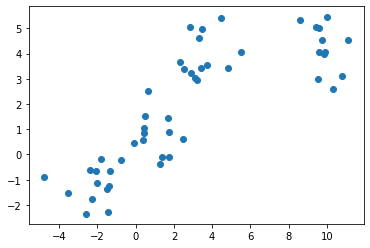

In [2]:
X1, y1 = make_blobs(n_samples=50,
                   centers=[[4, 4], [-2, -1], [1, 1], [10, 4]],
                   cluster_std=0.9)

# plot the scatter plot
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

In [4]:
X1

array([[ 2.50520782,  3.4080537 ],
       [ 1.36623748, -0.10457451],
       [ 2.48238333,  0.62196363],
       [ 3.42927531,  3.44879972],
       [-1.42606856, -2.26118028],
       [ 9.90885892,  4.0759571 ],
       [-4.77725824, -0.89714438],
       [-2.58020147, -2.34255986],
       [-0.09096781,  0.45046226],
       [10.32081771,  2.58511011],
       [ 0.43192345,  0.83475864],
       [ 4.82256316,  3.44789257],
       [10.01201581,  5.46730297],
       [ 9.5339017 ,  2.97810521],
       [ 3.12447787,  3.02073989],
       [ 1.29212938, -0.38997085],
       [-0.79418541, -0.21453235],
       [-2.4012493 , -0.6181725 ],
       [ 0.38263083,  0.58901347],
       [ 9.86812819,  3.98578427],
       [ 5.51684297,  4.06212083],
       [ 2.81590589,  5.0369867 ],
       [ 3.20809414,  2.94830214],
       [ 4.47041857,  5.39357268],
       [ 1.71518508, -0.08620932],
       [-3.55147017, -1.52822723],
       [ 9.5978472 ,  4.08209921],
       [11.11785253,  4.54806701],
       [ 3.29876701,

In [5]:
y1

array([0, 2, 2, 0, 1, 3, 1, 1, 2, 3, 2, 0, 3, 3, 0, 2, 1, 1, 2, 3, 0, 0,
       0, 0, 2, 1, 3, 3, 0, 3, 0, 0, 3, 2, 1, 3, 2, 1, 1, 0, 2, 1, 0, 1,
       2, 3, 1, 2, 3, 1])

<hr>
<h3 id="agglomerative_clustering">Agglomerative Clustering</h3>
We will start by clustering the random data points we just created.

The <b> Agglomerative Clustering </b> class will require two inputs:
<ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 </li> </ul>
    <li> <b>linkage</b>: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. </li>
    <ul> 
        <li> Value will be: 'complete' </li> 
        <li> <b>Note</b>: It is recommended you try everything with 'average' as well </li>
    </ul>
</ul> <br>
Save the result to a variable called <b> agglom </b>

In [6]:
agglom = AgglomerativeClustering(n_clusters=4, linkage='average')
agglom

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4,
                        pooling_func='deprecated')

In [7]:
# fit the dataset
agglom.fit(X1, y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4,
                        pooling_func='deprecated')

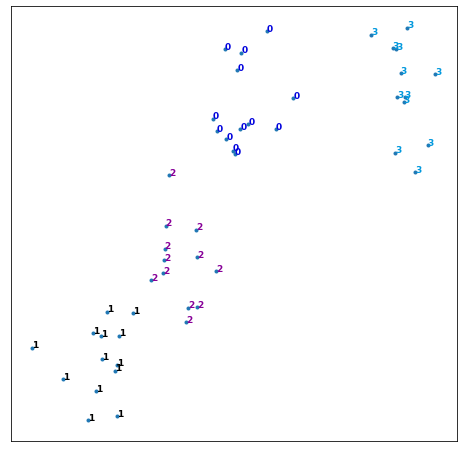

In [12]:
# plot our result
plt.figure(figsize=(8, 8))

# scale our data points
X_min, X_max = np.min(X1, axis=0), np.max(X1, axis=0)

# get the average distace for X1
X1 = ( X1 - X_min) / (X_max - X_min)

for i in range(X1.shape[0]):
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
            color=plt.cm.nipy_spectral(agglom.labels_[i]/10.0),
            fontdict={'weight':'bold', 'size':9})
    
plt.xticks([])
plt.yticks([])
plt.scatter(X1[:, 0], X1[:, 1], marker='.')


<h3 id="dendrogram">Dendrogram Associated for the Agglomerative Hierarchical Clustering</h3>
Remember that a <b>distance matrix</b> contains the <b> distance from each point to every other point of a dataset </b>. <br>
Use the function <b> distance_matrix, </b> which requires <b>two inputs</b>. Use the Feature Matrix, <b> X2 </b> as both inputs and save the distance matrix to a variable called <b> dist_matrix </b> <br> <br>
Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct. <br> (print out dist_matrix to make sure it's correct)

In [13]:
dist_Mat = distance_matrix(X1, X1)
print(dist_Mat)

[[0.         0.4554404  0.35674284 ... 0.25646802 0.48385847 0.64781098]
 [0.4554404  0.         0.11655485 ... 0.19959571 0.83282257 0.25082814]
 [0.35674284 0.11655485 0.         ... 0.11707142 0.71627228 0.36195924]
 ...
 [0.25646802 0.19959571 0.11707142 ... 0.         0.67161366 0.40445867]
 [0.48385847 0.83282257 0.71627228 ... 0.67161366 0.         1.07110184]
 [0.64781098 0.25082814 0.36195924 ... 0.40445867 1.07110184 0.        ]]


Using the linkage calss from hierarchy, pass in the parameters"
- the distance matrix
- 'complete' for the complete linkage

In [14]:
Z = hierarchy.linkage(dist_Mat, 'complete')
Z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


array([[3.20000000e+01, 4.80000000e+01, 3.96579373e-02, 2.00000000e+00],
       [1.40000000e+01, 2.20000000e+01, 4.32731687e-02, 2.00000000e+00],
       [5.00000000e+00, 1.90000000e+01, 6.02903612e-02, 2.00000000e+00],
       [1.70000000e+01, 3.40000000e+01, 7.87770376e-02, 2.00000000e+00],
       [3.70000000e+01, 4.30000000e+01, 9.93409991e-02, 2.00000000e+00],
       [1.00000000e+00, 2.40000000e+01, 1.05905308e-01, 2.00000000e+00],
       [2.60000000e+01, 5.20000000e+01, 1.06109845e-01, 3.00000000e+00],
       [0.00000000e+00, 3.00000000e+01, 1.15646763e-01, 2.00000000e+00],
       [4.90000000e+01, 5.40000000e+01, 1.24740378e-01, 3.00000000e+00],
       [3.00000000e+00, 3.10000000e+01, 1.42157950e-01, 2.00000000e+00],
       [2.10000000e+01, 3.90000000e+01, 1.69319484e-01, 2.00000000e+00],
       [1.00000000e+01, 3.60000000e+01, 1.70146528e-01, 2.00000000e+00],
       [2.00000000e+00, 4.00000000e+01, 2.00620077e-01, 2.00000000e+00],
       [8.00000000e+00, 1.80000000e+01, 2.13451298e

In [16]:
type(Z)
Z.shape

(49, 4)

A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters. 
By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering. 

Next, we will save the dendrogram to a variable called <b>dendro</b>. In doing this, the dendrogram will also be displayed.
Using the <b> dendrogram </b> class from hierarchy, pass in the parameter:
<ul> <li> Z </li> </ul>

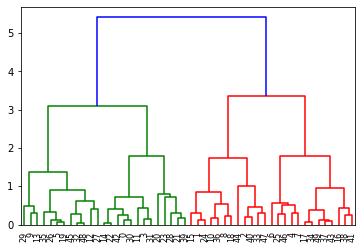

In [17]:
dendro = hierarchy.dendrogram(Z)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


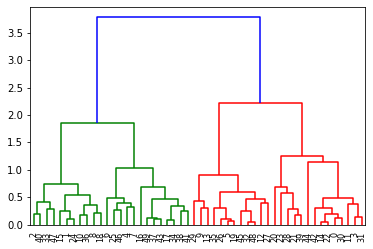

In [19]:
Z_avg = hierarchy.linkage(dist_Mat, 'average')
dendro_avg = hierarchy.dendrogram(Z_avg)